## Fixed boundaries - run02

This run has fixed boundary conditions u,v and initial T, S, Tr fields from run42 .The fields were the same cross section taken at day 3. This run is a test case to set up a longer run in Bugaboo. It went "out of bounds" after 10 iterations and I will try to see why.

In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [32]:
grid_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run02/mnc_0003/grid.t001.nc'
state_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run02/mnc_0003/state.0000000008.t001.nc'
ptracers_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run02/mnc_0003/ptracers.0000000000.t001.nc'

grid = xr.open_dataset(grid_file)
state = xr.open_dataset(state_file)
ptracers = xr.open_dataset(ptracers_file)

## Let's see what did the model read


In [33]:
u_0 = state.U.isel(Xp1=120, T=0)
v_0 = state.V.isel(X=120, T=0)

u_bdy = state.U.isel(Xp1=0, T=0)
v_bdy = state.V.isel(X=0, T=0)
u_Ebdy = state.U.isel(Xp1=360, T=0)
v_Ebdy = state.V.isel(X=359, T=0)

Temp_0 = state.Temp.isel(X=120, T=0)
S_0 = state.S.isel(X=120, T=0)
Tr_0 = ptracers.Tr1.isel(X=120, T=0)

Temp_0_can = state.Temp.isel(X=180, T=0)
S_0_can = state.S.isel(X=180, T=0)
Tr_0_can = ptracers.Tr1.isel(X=180, T=0)

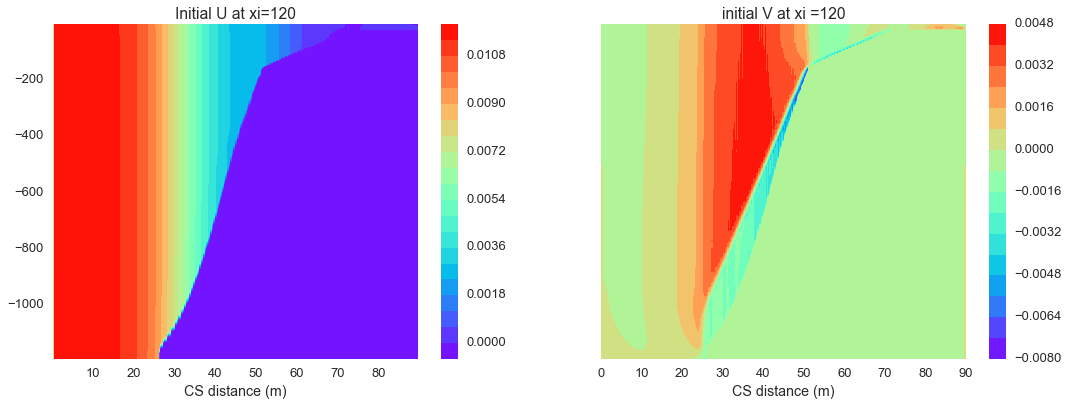

In [34]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_0,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_0,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V at xi =120')
ax[1].set_xlabel('CS distance (m)')


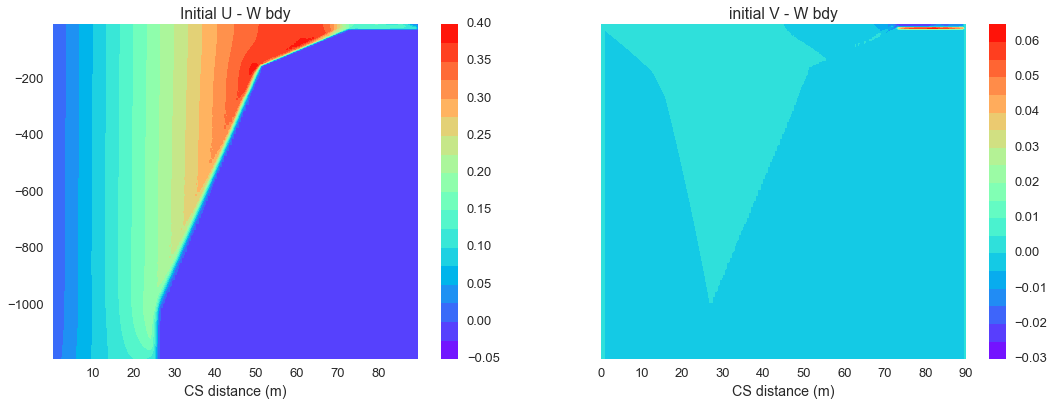

In [35]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_bdy,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U - W bdy')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_bdy,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V - W bdy')
ax[1].set_xlabel('CS distance (m)')


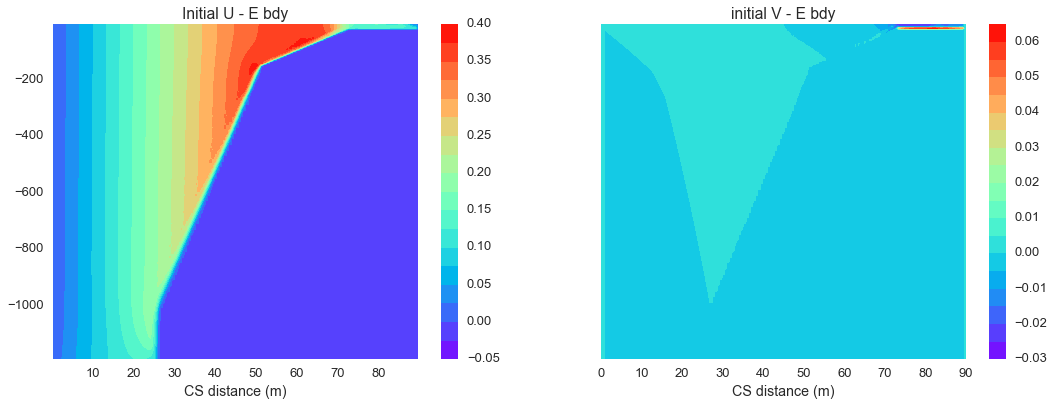

In [36]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_Ebdy,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U - E bdy')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_Ebdy,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V - E bdy')
ax[1].set_xlabel('CS distance (m)')


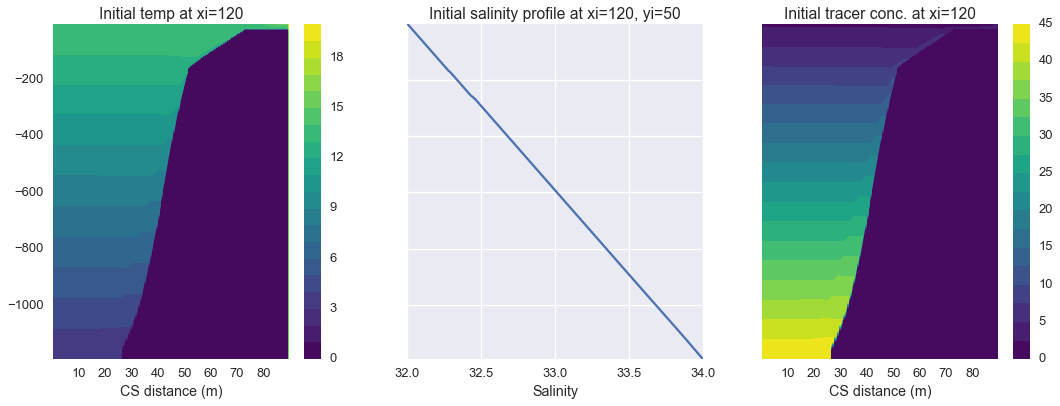

In [37]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_0,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

pl1 = ax[1].plot(S_0[:,50],grid.RC)
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_0,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')



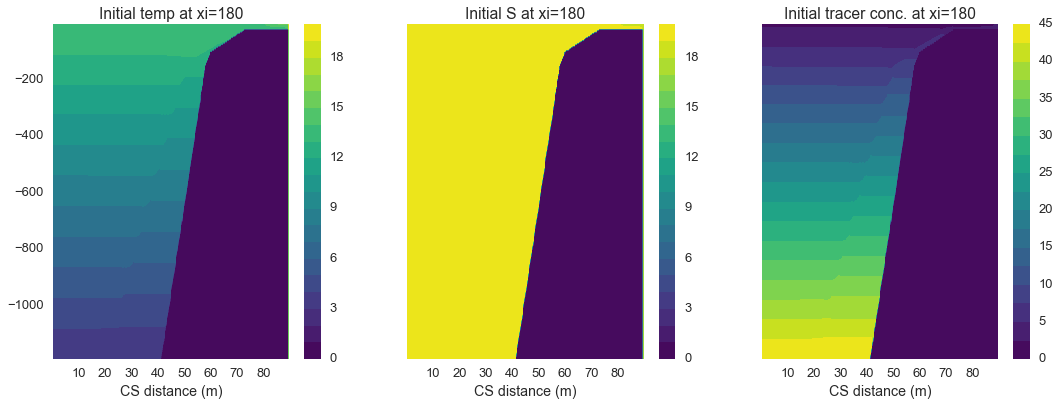

In [39]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_0_can,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial temp at xi=180')
ax[0].set_xlabel('CS distance (m)')


cf2 = ax[1].contourf(grid.Y/1000,grid.RC,S_0_can,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[1])
ax[1].set_title('Initial S at xi=180')
ax[1].set_xlabel('CS distance (m)')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_0_can,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=180')
ax[2].set_xlabel('CS distance (m)')



In [40]:
uu = state.U.isel(Z=30, T=0)
vv = state.V.isel(Z=30, T=0)

TT = state.Temp.isel(Z=30, T=0)
SS = state.S.isel(Z=30, T=0)
Tr = ptracers.Tr1.isel(Z=30, T=0)

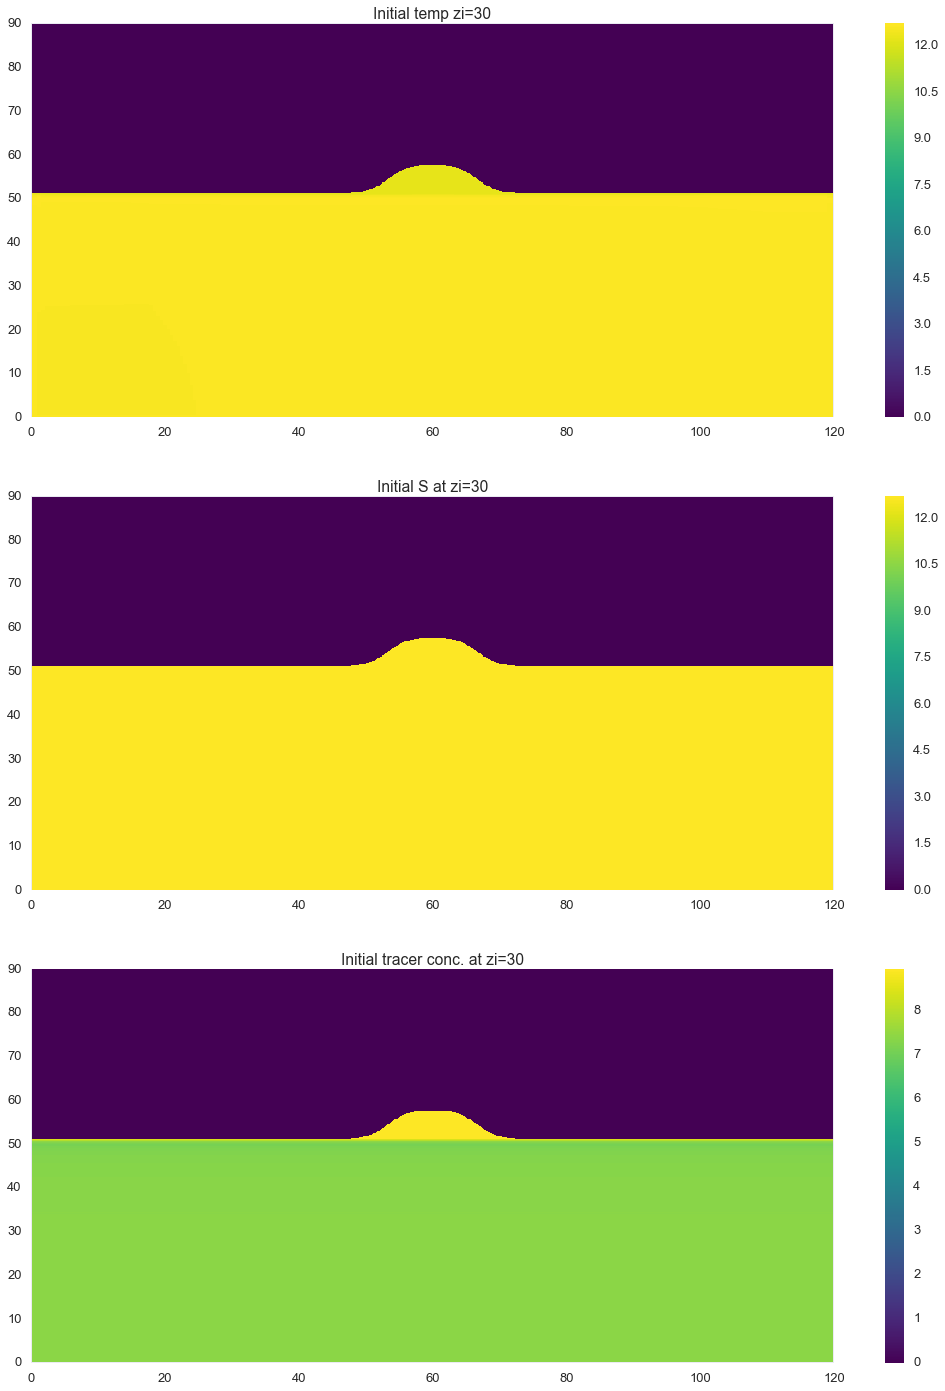

In [41]:
sns.set_context('talk')
fig,ax = plt.subplots(3,1,figsize=(18,24), sharey = True)

cf1 = ax[0].pcolor(grid.X/1000,grid.Y/1000,TT, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial temp zi=30')


cf2 = ax[1].pcolor(grid.X/1000,grid.Y/1000,SS, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[1])
ax[1].set_title('Initial S at zi=30')

cf3 = ax[2].pcolor(grid.X/1000,grid.Y/1000,Tr, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at zi=30')


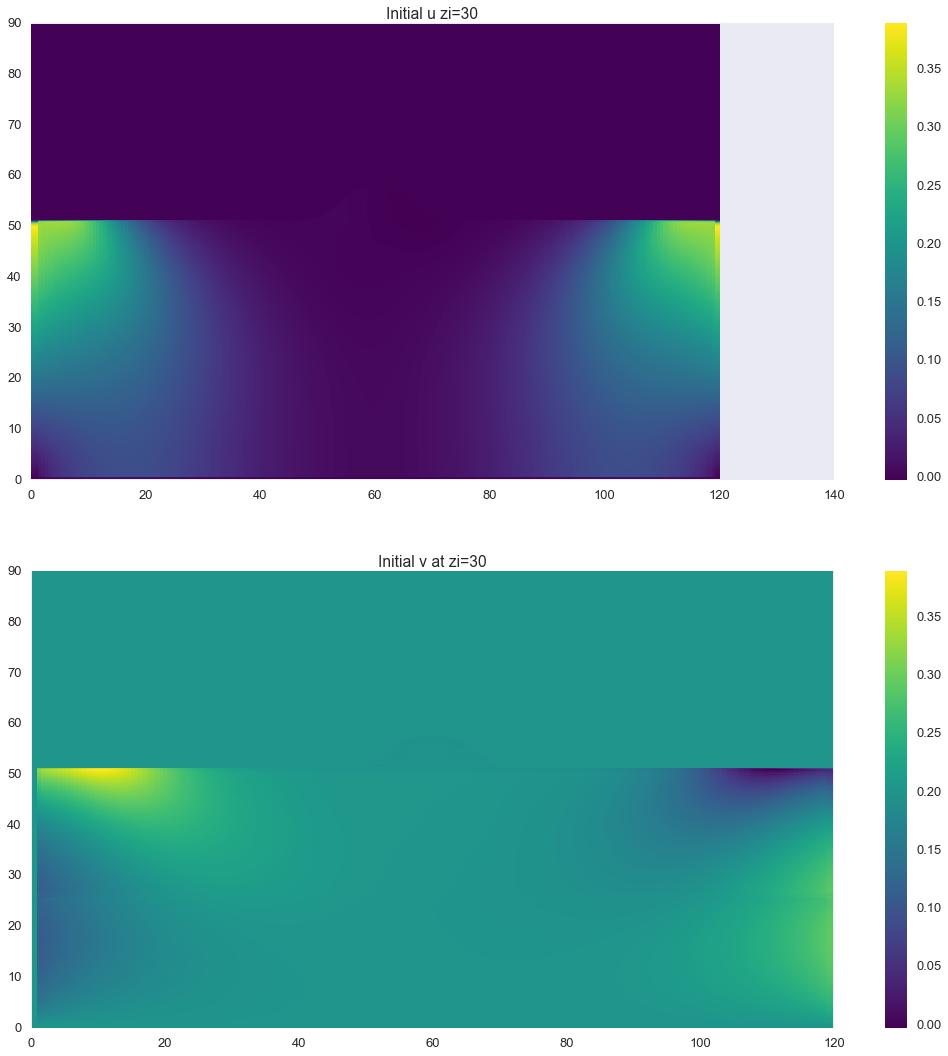

In [42]:
sns.set_context('talk')
fig,ax = plt.subplots(2,1,figsize=(18,18), sharey = True)

cf1 = ax[0].pcolor(grid.Xp1/1000,grid.Y/1000,uu, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial u zi=30')


cf2 = ax[1].pcolor(grid.X/1000,grid.Yp1/1000,vv, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[1])
ax[1].set_title('Initial v at zi=30')



11.11111111111111